## Load the data

### Subtask:
Load the "Titanic-Dataset.csv" into a pandas DataFrame.

**Reasoning**:
Import pandas and load the dataset into a DataFrame.

In [17]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first 5 rows of the DataFrame to verify the data is loaded correctly
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
(df['Age']<3).count()

np.int64(891)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Explore the data

### Subtask:
Understand the structure of the data, identify relevant columns for survival prediction, and check for missing values.

**Reasoning**:
Display the column names and their data types and get the number of missing values for each column.

In [2]:
# Display information about the DataFrame, including the data types of each column and the number of non-null values
df.info()

# Print the number of missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarke

## Preprocess the data

### Subtask:
Clean and prepare the data for survival prediction. This involves handling missing values, encoding categorical variables, and selecting relevant features.

**Reasoning**:
Fill missing 'Age' values with the median, fill missing 'Embarked' values with the most frequent value, drop the 'Cabin' column due to a large number of missing values, and encode the 'Sex' column as it is a categorical feature.

In [ ]:
# Fill missing values in the 'Age' column with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in the 'Embarked' column with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing values in the 'Sex' column with the mode *before* mapping
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

# Encode the 'Sex' column: 0 for female, 1 for male
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Drop the 'Cabin' column due to a large number of missing values
df.drop('Cabin', axis=1, inplace=True)

# Display the first 5 rows of the DataFrame after preprocessing
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


**Reasoning**:
Verify that the data cleaning steps were successful by checking for remaining missing values and confirming the column changes.

In [ ]:
# Display information about the DataFrame after cleaning to check data types and non-null counts
df.info()

# Print the number of missing values per column after cleaning
print("\nMissing values per column after cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB

Missing values per column after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Prepare data for modeling

### Subtask:
Split the data into training and testing sets.

**Reasoning**:
Import the necessary library, define features (X) and target (y), and split the data into 80% training and 20% testing sets.

In [ ]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# We drop 'PassengerId', 'Name', and 'Ticket' as they are not useful for the model
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = df['Survived']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=['Embarked'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 9)
Shape of X_test: (179, 9)
Shape of y_train: (712,)
Shape of y_test: (179,)


## Build a classification model

### Subtask:
Train a classification model (e.g., Logistic Regression, RandomForest, etc.) to predict survival based on the features.

**Reasoning**:
Import the Logistic Regression model, initialize and train the model using the training data.

In [ ]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with an increased number of iterations
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Evaluate the model

### Subtask:
Assess the model's performance using metrics like accuracy, precision, and recall.

**Reasoning**:
Import necessary metrics, make predictions on the test set, and calculate the accuracy of the model.

In [ ]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639

Confusion Matrix:
[[90 15]
 [19 55]]


## Visualize the Confusion Matrix

### Subtask:
Draw a confusion matrix heatmap to visualize the model's performance.

**Reasoning**:
Import necessary libraries, create a heatmap of the confusion matrix, and add labels for better interpretation.

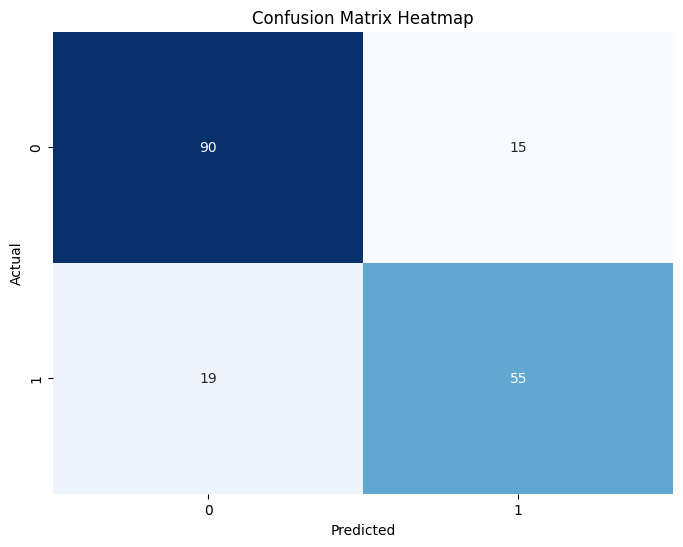

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Task
Perform survival prediction on the "Titanic-Dataset.csv" dataset. The final model should have an accuracy of over 80%. Include steps for data loading, exploration, outlier checking, preprocessing, model building, evaluation, and refinement. Visualize the results with a confusion matrix heatmap. Comment each step in simple English.

## Check for outliers

### Subtask:
Identify and analyze potential outliers in the numerical features of the dataset.


**Reasoning**:
Select numerical columns and generate box plots to visualize potential outliers.



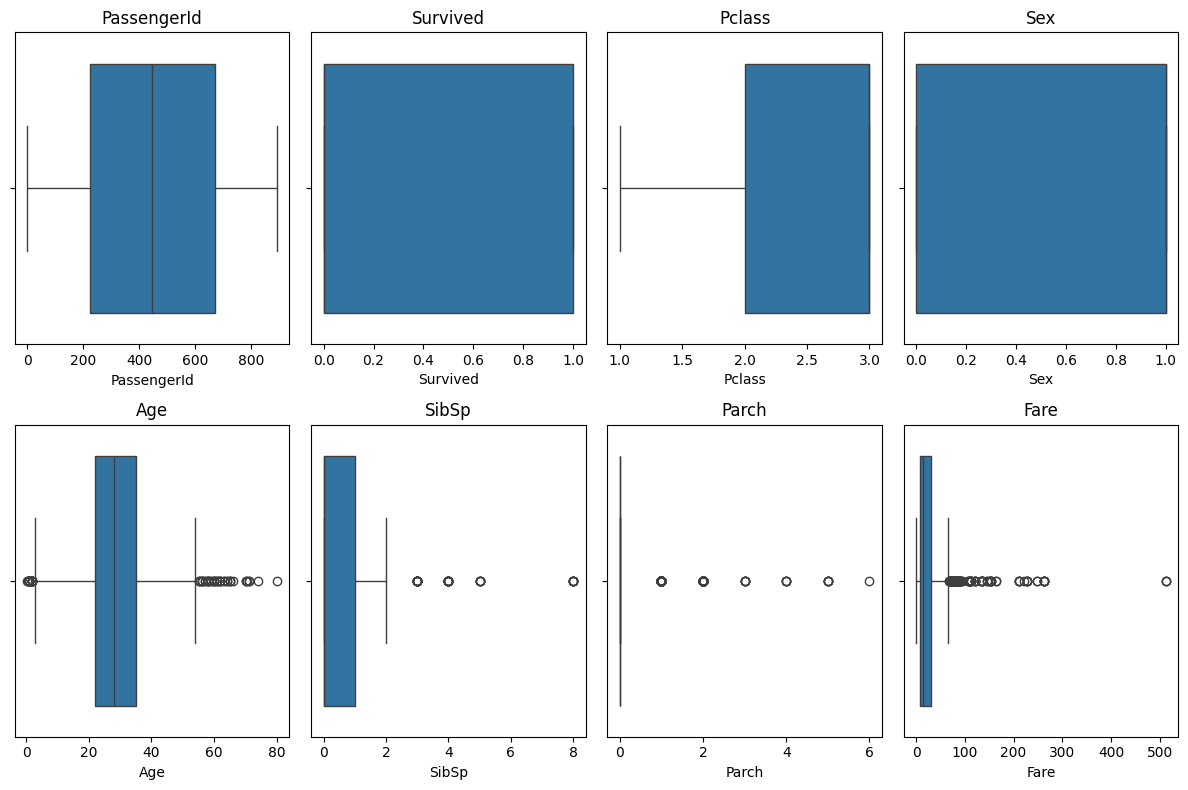

In [ ]:
# Select numerical columns for outlier checking
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Refine the model

### Subtask:
Refine the model by trying a different algorithm.

**Reasoning**:
Import the RandomForestClassifier model, initialize and train it using the training data.

In [ ]:
# Import RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the refined model

### Subtask:
Assess the refined model's performance using metrics like accuracy, precision, and recall.

**Reasoning**:
Make predictions on the test set using the refined model and calculate evaluation metrics.

In [ ]:
# Make predictions on the test set using the refined model
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the refined model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Print the evaluation metrics for the refined model
print(f"Refined Model Accuracy: {accuracy_rf:.4f}")
print(f"Refined Model Precision: {precision_rf:.4f}")
print(f"Refined Model Recall: {recall_rf:.4f}")
print(f"Refined Model F1-score: {f1_rf:.4f}")
print("\nRefined Model Confusion Matrix:")
print(conf_matrix_rf)

Refined Model Accuracy: 0.8045
Refined Model Precision: 0.7671
Refined Model Recall: 0.7568
Refined Model F1-score: 0.7619

Refined Model Confusion Matrix:
[[88 17]
 [18 56]]


## Visualize the Refined Model Confusion Matrix

### Subtask:
Draw a confusion matrix heatmap for the refined model to visualize its performance.

**Reasoning**:
Create a heatmap of the confusion matrix for the refined model and add labels for better interpretation.

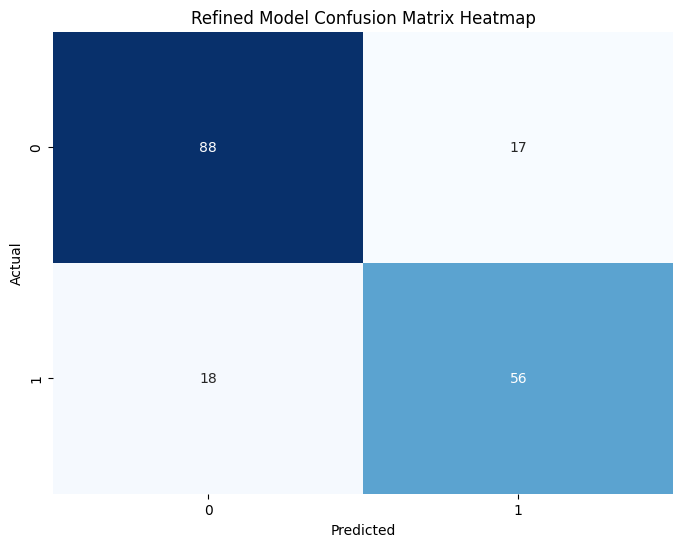

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix for the refined model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Refined Model Confusion Matrix Heatmap')
plt.show()

## Handle outliers

### Subtask:
Apply a method to mitigate the impact of outliers in the numerical features by clipping the data.

**Reasoning**:
Clip the values in the numerical columns that showed outliers based on the box plots to reduce their impact on the model.

In [ ]:
# Identify numerical columns that showed outliers in the box plots
outlier_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Define a function to clip outliers using IQR
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply clipping to the identified outlier columns
for col in outlier_cols:
    df = clip_outliers_iqr(df, col)

# Display the first 5 rows of the DataFrame after outlier handling
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,S


In [9]:
percentage = df[(df['Pclass']==1 & df['Survived']==1)].valuce_counts(normalize=True)*100
percentage

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
percentage = df[(df['Pclass']==1) & (df['Survived']==1)].value_counts(normalize=True)*100
print(percentage)

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85    C           0.943396
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123   S           0.943396
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103   S           0.943396
24           1         1       Sloper, Mr. William Thompson                         male    28.0  0      0      113788    35.5000  A6     S           0.943396
53           1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)             female  49.0  1      0      PC 17572  76.7292  D33    C           0.943396
                                                          

In [13]:
df['Pclass'].groupby(df['Survived']).value_counts(normalize=True)*100

Survived  Pclass
0         3         67.759563
          2         17.668488
          1         14.571949
1         1         39.766082
          3         34.795322
          2         25.438596
Name: proportion, dtype: float64

In [15]:
df['Survived'].groupby(df['Sex']).value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [16]:
df['Survived'].value_counts(normalize = True)

,proportion
Survived,
0,0.616162
1,0.383838


In [24]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342
